# <font color = brown>Problem Statement
---

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

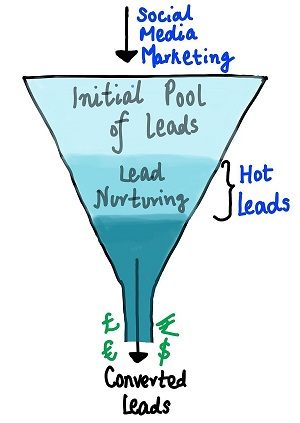

---

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## <font color = brown>Data
---
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## <font color = brown>Goals of the Case Study
#### There are quite a few goals for this case study.
---

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## <font color = brown>Results Expected

-  A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
-  The word document filled with solutions to all the problems.
-  The overall approach of the analysis in a presentation.
   -    Mention the problem statement and the analysis approach briefly 
   -    Explain the results in business terms
   -    Include visualisations and summarise the most important results in the presentation
-  A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

##  <font color = green> Reading and Understanding of the Dataset

#### Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
lead_Data = pd.read_csv('leads.csv')

In [3]:
# Inspecting 1st 5 row's of dataset
lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# getting the shape of data set
lead_Data.shape

(9240, 37)

In [5]:
# lets look at the statistical data
lead_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking types of columns and null values in  in dataset 
lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It appears that this dataset has a significant number of category variables, for which we will need to build dummy variables. Additionally, there are numerous null values, so we must deal them appropriately.

##  <font color = green>Data Cleaning and Preperation

In [7]:
# Checking missing values Dataset
(lead_Data.isnull().sum()/lead_Data.shape[1])*100

Prospect ID                                          0.000000
Lead Number                                          0.000000
Lead Origin                                          0.000000
Lead Source                                         97.297297
Do Not Email                                         0.000000
Do Not Call                                          0.000000
Converted                                            0.000000
TotalVisits                                        370.270270
Total Time Spent on Website                          0.000000
Page Views Per Visit                               370.270270
Last Activity                                      278.378378
Country                                           6651.351351
Specialization                                    3886.486486
How did you hear about X Education                5964.864865
What is your current occupation                   7270.270270
What matters most to you in choosing a course     7321.621622
Search  

As you can see, many columns have a significant number of missing values. These columns are obviously useless. Since our dataframe contains 9000 datapoints, let's remove the columns with more than 3000 missing values because they are useless to us.

In [8]:
# Dropping columns which has missing values above 3000 threshold
for col in lead_Data:
    if lead_Data[col].isnull().sum()> 3000:
        lead_Data.drop(col, 1, inplace = True)

In [9]:
# Checking null or missing values in terms of percentage
round((lead_Data.isnull().sum()/len(lead_Data.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We will drop `city` and `country` as its not of that use in the analysis

In [10]:
lead_Data.drop(['City','Country'], 1, inplace = True)

In [11]:
lead_Data['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Remember that some of the columns had a level that reads "Select"? That level simply indicates that the student did not choose the choice for that particular column, which is why it says "Select" in those columns. These values are missing values, thus we must determine the level "Select" value counts over all of the columns in which they are present.

---

In [12]:
# Getting value caounts for every feature availabe
for column in lead_Data:
    print(lead_Data[column].astype('category').value_counts())
    print("__")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
__
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
__
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference

In [13]:
# Below are the columns which has 'Select' 
print(lead_Data['Lead Profile'].astype('category').value_counts())


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


In [14]:
print(lead_Data['How did you hear about X Education'].astype('category').value_counts())

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


In [15]:
print(lead_Data['Specialization'].astype('category').value_counts())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In above `2` columns the value counts of `select` is very high and its of no use for our analysis better we should drop it

In [16]:
lead_Data.drop(['How did you hear about X Education','Lead Profile'], 1, inplace= True)

---
Also note that when you received the value counts for all the columns, some of them had only one value that predominated among all the data points. Included in this list are the phrases "Do Not Call," "Search," "Magazine," "Newspaper Article," "X Education Forums," "Newspaper," "Digital Advertisement," "Through Recommendations," "Receive More Updates About Our Courses," "Update me on Supply Chain Content," "Get updates on DM Content," and "I agree to pay the amount through check." Since almost every result for these variables is "No," it is better to remove these columns because they won't be useful for our study.

---

In [17]:
# Dropping unnecessary columns
lead_Data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1, inplace = True)

In [18]:
# Checking null values AGain
lead_Data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column labelled "What is your present occupation" currently has a large number of null responses. You can now remove the entire row, but we decide not to since we have already lost so many feature variables and it might be important in the analysis. The null rows for the column "What is your present occupation" can now be removed.

In [19]:
lead_Data =lead_Data[~lead_Data['What is your current occupation'].isnull()]

In [20]:
lead_Data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

From above we can get that the null value present in coulmns are very less what we will do is drop the these rows from the columns

In [21]:
lead_Data = lead_Data[~lead_Data['TotalVisits'].isnull()]

In [22]:
lead_Data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [23]:
lead_Data = lead_Data[~lead_Data['Lead Source'].isnull()]

In [24]:
lead_Data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [25]:
lead_Data = lead_Data[~lead_Data['Specialization'].isnull()]

In [26]:
lead_Data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now, our dataset does not have any missing value nd we dropped some rows too, lets check the shape of dataset

In [27]:
lead_Data.shape

(6373, 14)

In [28]:
len(lead_Data.index)

6373

In [29]:
# lets check % of the row wd original dataset which have got at 1st
len(lead_Data.index)/9240

0.6897186147186147

Thus, we have approx `69%` of rows which appears to good for Analysis

In [30]:
# lets have look at dataset again
lead_Data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


`Prospect ID`, `Lead Number` wont be of any use for Analyis Part, thus we will drop it

In [31]:
lead_Data.drop(['Prospect ID', 'Lead Number'], 1, inplace= True)

In [32]:
#rechecking the data set
lead_Data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## <font color = green> Preparing the Data For Model Building

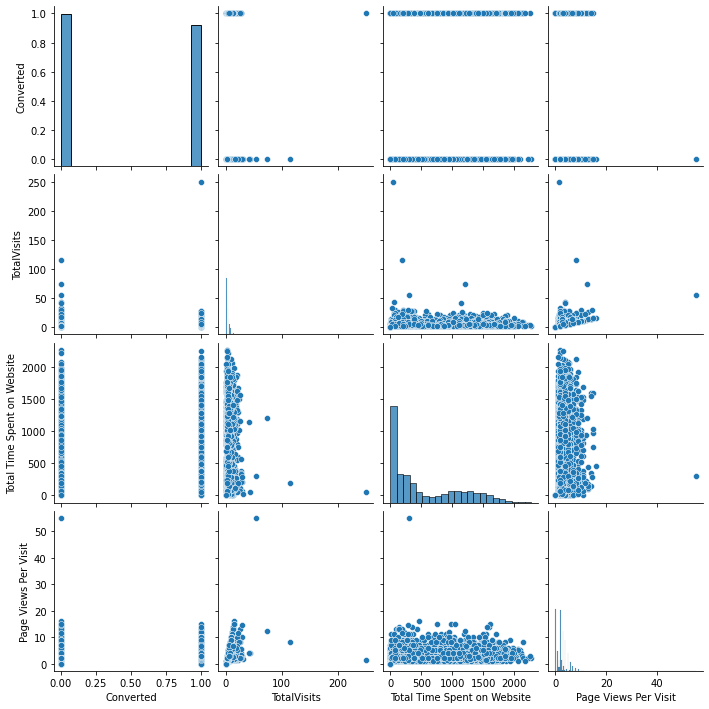

In [33]:
sns.pairplot(lead_Data)
plt.show()

---
1.Page Views per value and Total Time Spent on websites has less correlation  between them cause at certain point it stopped and moved lengthwise not   diagonaly.<br>
2.Toatl time spent on website, Total visits and Page views per visit has same similar relation qualtitatvely but not Quantitatively. <br>
3.Total visits and page views per visit are not much related rest plot does show much info about their features.

### Creating Dummies
---
1st we need to check features whose type is object so we can convert its dummies

In [34]:
# checking info again
lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [35]:
# Creating dummies
lead_Sb = pd.get_dummies(lead_Data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first = True)

# Adding dummies into main dataframe
lead_Data = pd.concat([lead_Data, lead_Sb], axis = 1)
lead_Data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# Creating seperate dummies for specilization cause it has select in and its of no use,thus we will drop it
dummy = pd.get_dummies(lead_Data['Specialization'], prefix = 'Specialization')
dummy2 = dummy.drop(['Specialization_Select'], axis =1)

# Adding the dummy2 into master dataframe
lead_Data = pd.concat([lead_Data, dummy2], axis = 1)
lead_Data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Dropping the feature for which dummies is created

lead_Data = lead_Data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_Data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train_Test_Split
---
Splitting Dataset into train and test

In [38]:
# Importing Modules from sklearn library
import sklearn
from sklearn.model_selection import train_test_split

In [39]:
# creating variables X and y
X = lead_Data.drop(['Converted'], 1)

In [40]:
y = lead_Data['Converted']
y[:10]

0     0
1     0
2     1
3     0
4     1
6     1
10    1
11    1
12    1
13    0
Name: Converted, dtype: int64

In [41]:
# Splitting Dataset in 70 to 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.70, random_state= 100)

### Scaling
---
Performing scaling on Numeric variable which has different scales

In [42]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Scaling of Numerical Features
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Corelation Matrix
---

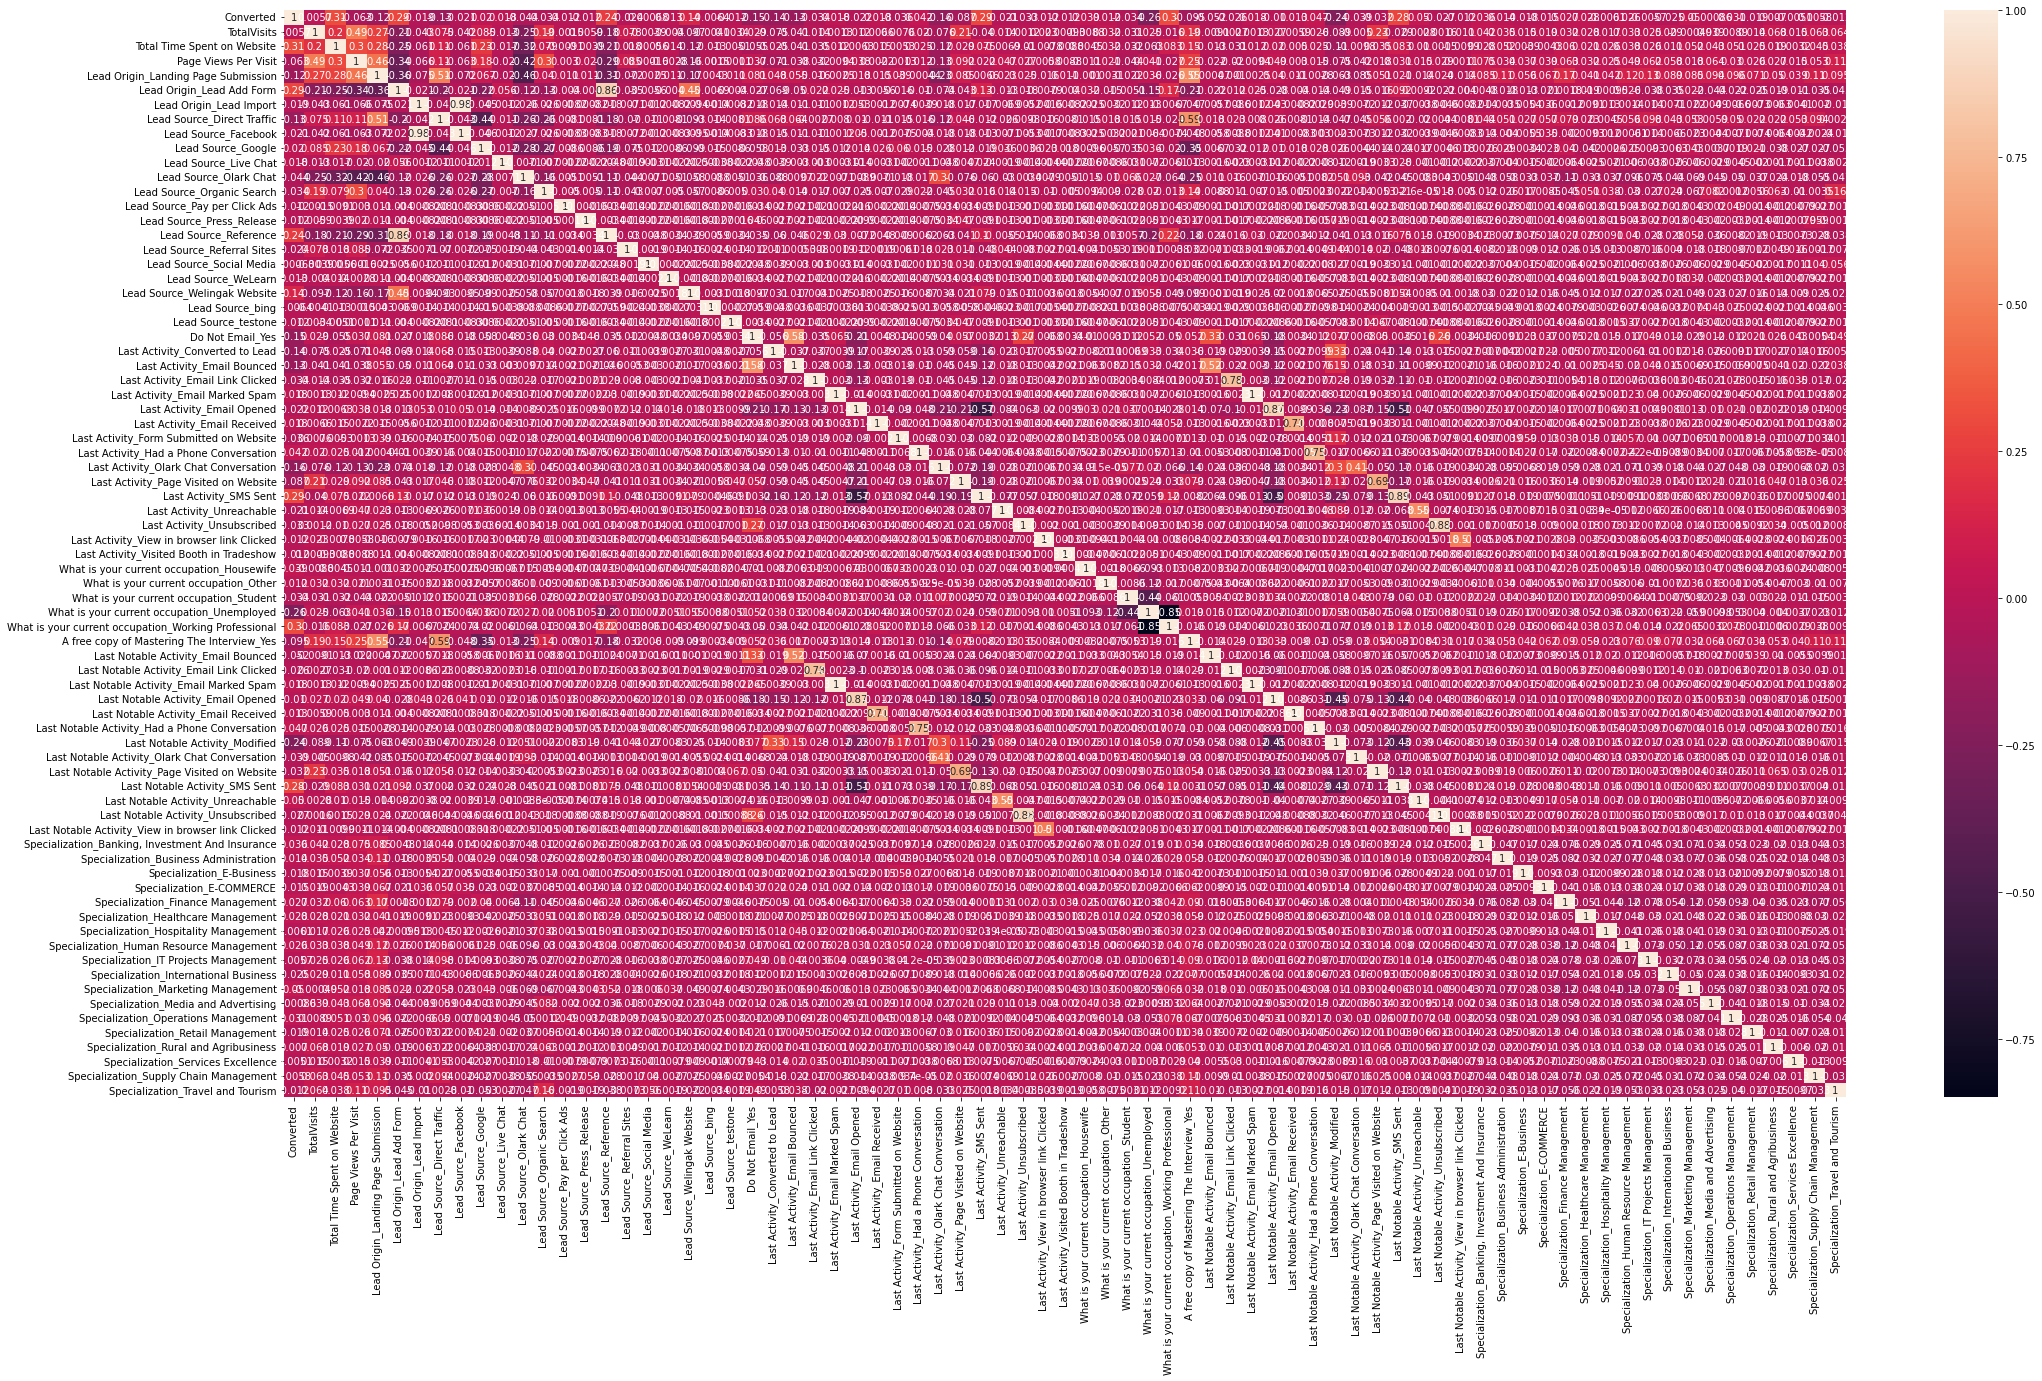

In [44]:
plt.figure(figsize= [35,20])
sns.heatmap(lead_Data.corr(), annot = True)
plt.show()

Because of large no. of features heatmap is not much usefull, here, thus we will use rfe and vif for for elemenation and correlation as we will be using it further for sure

## <font color = green> 1. Model

Now let's get started making models. As you can see, the dataset has a lot of variables that we are unable to handle. Therefore, the optimal strategy is to use RFE to pick a limited number of features from this pool of variables.

In [45]:
# From sklearn importing logistic_regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
# Using rfe for selecting 15 significant variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg)  # Running rfe 
rfe= rfe.fit(X_train, y_train)

In [49]:
# lets check which feature variables are selected by rfe
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_WeLearn', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_testone', False, 16),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-B

In [51]:
X_train = X_train[col]

*Checking P-value and VIF usning statsmodels* 

In [52]:
# Importing statsmodel library
import statsmodels.api as sm

In [53]:
# Adding constant
X_train_sm = sm.add_constant(X_train)
# fitting the model
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.4
Date:                Sat, 28 Jan 2023   Deviance:                       3956.8
Time:                        16:29:34   Pearson chi2:                 4.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3922
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6997      0.625     -1.119      0.263      -1.925       0.526
TotalVisits                                             11.5794      3.195      3.625      0.000       5.318      17.841
Total Time Spent on Website                              4.3795      0.189     23.173      0.000       4.009       4.750
Page Views Per Visit                                    -1.0770      0.449     -2.401      0.016      -1.956      -0.198
Lead Origin_Landing Page Submission                     -0.9476      0.133     -7.146      0.000      -1.207      -0.688
Lead Origin_Lead Add Form                                2.2277      1.175      1.897      0.058      -0.074       4.530
Lead Source_Olark Chat                                   1.1996      0.155      7.756      0.000       0.896       1.503
Lead Source_Reference                                    1.3344      1.196      1.116      0.264      -1.009       3.678
Lead Source_Welingak Website                             3.7759      1.544      2.445      0.014       0.749       6.803
Do Not Email_Yes                                        -1.3924      0.227     -6.146      0.000      -1.836      -0.948
Last Activity_Email Bounced                             -1.0860      0.672     -1.617      0.106      -2.403       0.231
Last Activity_Had a Phone Conversation                   1.5468      0.985      1.571      0.116      -0.383       3.477
Last Activity_Olark Chat Conversation                   -0.6928      0.198     -3.501      0.000      -1.081      -0.305
Last Activity_SMS Sent                                   1.0018      0.088     11.354      0.000       0.829       1.175
What is your current occupation_Housewife               22.7974   2.35e+04      0.001      0.999    -4.6e+04    4.61e+04
What is your current occupation_Student                 -0.9573      0.651     -1.471      0.141      -2.233       0.318
What is your current occupation_Unemployed              -1.1235      0.610     -1.842      0.065      -2.319       0.072
What is your current occupation_Working Professional     1.4099      0.639      2.206      0.027       0.157       2.663
Last Notable Activity_Email Bounced                      1.4940      0.810      1.845      0.065      -0.093       3.081
Last Notable Activity_Email Link Clicked                -0.5682      0.282     -2.015      0.044      -1.121      -0.015
Last Notable Activity_Had a Phone Conversation          22.2685   2.09e+04      0.001      0.999    -4.1e+04    4.11e+04
Last Notable Activity_Modified                          -0.7425      0.097     -7.679      0.000      -0.932      -0.553
Last Notable Activity_Unreachable                        2

There are numerous variables with p-values higher than 0.05. We'll have to look after them. But let's first take a look at the VIFs.

In [54]:
# Importing Variance_Inflation_Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.64
6,Lead Source_Reference,65.38
7,Lead Source_Welingak Website,20.08
15,What is your current occupation_Unemployed,9.81
3,Lead Origin_Landing Page Submission,6.10
2,Page Views Per Visit,4.53
19,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
16,What is your current occupation_Working Profes...,2.42


With the exception of three variables, VIFs appear to be in a good range.
Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [56]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

## <font color = green> 2. Model

In [57]:
# Building a Model for new sets of varibale
logm2 = sm.GLM(y_train, sm.add_constant(X_train), family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.9
Date:                Sat, 28 Jan 2023   Deviance:                       3957.8
Time:                        16:29:36   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6991      0.625     -1.118      0.264      -1.925       0.526
TotalVisits                                             11.5792      3.195      3.625      0.000       5.318      17.840
Total Time Spent on Website                              4.3791      0.189     23.168      0.000       4.009       4.750
Page Views Per Visit                                    -1.0772      0.449     -2.402      0.016      -1.956      -0.198
Lead Origin_Landing Page Submission                     -0.9468      0.133     -7.141      0.000      -1.207      -0.687
Lead Origin_Lead Add Form                                3.5201      0.279     12.632      0.000       2.974       4.066
Lead Source_Olark Chat                                   1.1991      0.155      7.751      0.000       0.896       1.502
Lead Source_Welingak Website                             2.4827      1.039      2.389      0.017       0.445       4.520
Do Not Email_Yes                                        -1.3895      0.226     -6.140      0.000      -1.833      -0.946
Last Activity_Email Bounced                             -1.0890      0.672     -1.621      0.105      -2.406       0.228
Last Activity_Had a Phone Conversation                   1.5473      0.985      1.571      0.116      -0.383       3.478
Last Activity_Olark Chat Conversation                   -0.6927      0.198     -3.501      0.000      -1.080      -0.305
Last Activity_SMS Sent                                   1.0015      0.088     11.353      0.000       0.829       1.174
What is your current occupation_Housewife               22.7995   2.35e+04      0.001      0.999    -4.6e+04    4.61e+04
What is your current occupation_Student                 -0.9563      0.651     -1.470      0.142      -2.232       0.319
What is your current occupation_Unemployed              -1.1236      0.610     -1.843      0.065      -2.319       0.071
What is your current occupation_Working Professional     1.4108      0.639      2.207      0.027       0.158       2.663
Last Notable Activity_Email Bounced                      1.4940      0.810      1.845      0.065      -0.093       3.081
Last Notable Activity_Email Link Clicked                -0.5656      0.282     -2.008      0.045      -1.118      -0.014
Last Notable Activity_Had a Phone Conversation          22.2679    2.1e+04      0.001      0.999    -4.1e+04    4.11e+04
Last Notable Activity_Modified                          -0.7423      0.097     -7.678      0.000      -0.932      -0.553
Last Notable Activity_Unreachable                        2.3670      0.807      2.935      0.003       0.786       3.948
Specialization_Banking, Investment And Insurance         1

There are 4 features whose P-value is greater then 0.05, we will treat them accordingly after VIF nspection

In [58]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,9.80
3,Lead Origin_Landing Page Submission,6.09
2,Page Views Per Visit,4.53
18,Last Notable Activity_Had a Phone Conversation,2.46
9,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
4,Lead Origin_Lead Add Form,2.41
15,What is your current occupation_Working Profes...,2.41
5,Lead Source_Olark Chat,2.20
8,Last Activity_Email Bounced,2.03


All of the VIFs are currently under 5. Therefore, let's discard the results starting with "Last Notable Activity Had a Phone Conversation" that have high p-values.

In [59]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

## <font color = green> 3. Model

In [60]:
# Buliding another model 
logm2 = sm.GLM(y_train, sm.add_constant(X_train), familiy= sm.families.Binomial())
res= logm2.fit()
res.summary()

C:\Users\bipul\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['familiy']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Gaussian   Df Model:                           35
Link Function:               identity   Scale:                         0.15257
Method:                          IRLS   Log-Likelihood:                -2118.2
Date:                Sat, 28 Jan 2023   Deviance:                       675.14
Time:                        16:29:39   Pearson chi2:                     675.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4751
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3912      0.098      4.006      0.000       0.200       0.583
TotalVisits                                              1.2292      0.304      4.047      0.000       0.634       1.824
Total Time Spent on Website                              0.7806      0.027     29.140      0.000       0.728       0.833
Page Views Per Visit                                    -0.1314      0.063     -2.096      0.036      -0.254      -0.009
Lead Origin_Landing Page Submission                     -0.1346      0.019     -7.001      0.000      -0.172      -0.097
Lead Origin_Lead Add Form                                0.4785      0.030     16.097      0.000       0.420       0.537
Lead Source_Olark Chat                                   0.1973      0.023      8.395      0.000       0.151       0.243
Lead Source_Welingak Website                             0.2285      0.047      4.841      0.000       0.136       0.321
Do Not Email_Yes                                        -0.1837      0.029     -6.353      0.000      -0.240      -0.127
Last Activity_Email Bounced                              0.0021      0.050      0.042      0.966      -0.097       0.101
Last Activity_Had a Phone Conversation                   0.4059      0.095      4.258      0.000       0.219       0.593
Last Activity_Olark Chat Conversation                   -0.1195      0.027     -4.424      0.000      -0.172      -0.067
Last Activity_SMS Sent                                   0.1666      0.013     12.435      0.000       0.140       0.193
What is your current occupation_Housewife                0.2745      0.168      1.632      0.103      -0.055       0.604
What is your current occupation_Student                 -0.1784      0.102     -1.755      0.079      -0.378       0.021
What is your current occupation_Unemployed              -0.2094      0.096     -2.188      0.029      -0.397      -0.022
What is your current occupation_Working Professional     0.0822      0.097      0.845      0.398      -0.108       0.273
Last Notable Activity_Email Bounced                      0.0194      0.081      0.239      0.811      -0.140       0.178
Last Notable Activity_Email Link Clicked                -0.0900      0.043     -2.104      0.035      -0.174      -0.006
Last Notable Activity_Modified                          -0.1190      0.014     -8.383      0.000      -0.147      -0.091
Last Notable Activity_Unreachable                        0.3427      0.099      3.477      0.001       0.150       0.536
Specialization_Banking, Investment And Insurance         0.1895      0.033      5.692      0.000       0.124       0.255
Specialization_Business Administration                   0

Dropping 'What is your current occupation_Housewife' as its p-value is greater then 0.05

In [61]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [62]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,9.65
3,Lead Origin_Landing Page Submission,6.09
2,Page Views Per Visit,4.52
1,Total Time Spent on Website,2.42
4,Lead Origin_Lead Add Form,2.39
14,What is your current occupation_Working Profes...,2.39
5,Lead Source_Olark Chat,2.19
8,Last Activity_Email Bounced,2.03
23,Specialization_Finance Management,1.94
0,TotalVisits,1.84


Here, All features seems good which has VIF under 0.05

## <font color = green> 4. Model

In [63]:
# Fitting model 
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.2
Date:                Sat, 28 Jan 2023   Deviance:                       3966.5
Time:                        16:29:39   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0502      0.580     -0.086      0.931      -1.187       1.087
TotalVisits                                             11.3798      3.174      3.586      0.000       5.160      17.600
Total Time Spent on Website                              4.3708      0.189     23.141      0.000       4.001       4.741
Page Views Per Visit                                    -1.0955      0.448     -2.445      0.014      -1.974      -0.217
Lead Origin_Landing Page Submission                     -0.9376      0.132     -7.078      0.000      -1.197      -0.678
Lead Origin_Lead Add Form                                3.5204      0.279     12.633      0.000       2.974       4.067
Lead Source_Olark Chat                                   1.1962      0.155      7.735      0.000       0.893       1.499
Lead Source_Welingak Website                             2.4821      1.039      2.388      0.017       0.445       4.519
Do Not Email_Yes                                        -1.3975      0.227     -6.168      0.000      -1.842      -0.953
Last Activity_Email Bounced                             -1.0793      0.672     -1.607      0.108      -2.396       0.237
Last Activity_Had a Phone Conversation                   2.6795      0.808      3.316      0.001       1.096       4.263
Last Activity_Olark Chat Conversation                   -0.6856      0.198     -3.466      0.001      -1.073      -0.298
Last Activity_SMS Sent                                   0.9999      0.088     11.339      0.000       0.827       1.173
What is your current occupation_Student                 -1.6034      0.609     -2.633      0.008      -2.797      -0.410
What is your current occupation_Unemployed              -1.7682      0.565     -3.127      0.002      -2.876      -0.660
What is your current occupation_Working Professional     0.7636      0.597      1.280      0.201      -0.406       1.933
Last Notable Activity_Email Bounced                      1.4914      0.810      1.842      0.065      -0.095       3.078
Last Notable Activity_Email Link Clicked                -0.5653      0.281     -2.009      0.045      -1.117      -0.014
Last Notable Activity_Modified                          -0.7502      0.096     -7.779      0.000      -0.939      -0.561
Last Notable Activity_Unreachable                        2.3629      0.807      2.929      0.003       0.781       3.944
Specialization_Banking, Investment And Insurance         1.3720      0.232      5.907      0.000       0.917       1.827
Specialization_Business Administration                   0.8261      0.207      3.993      0.000       0.421       1.232
Specialization_E-Business                                1

Dropping `What is your current occupation_Working Professional` feature

In [64]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [65]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.01
13,What is your current occupation_Unemployed,5.09
2,Page Views Per Visit,4.17
1,Total Time Spent on Website,2.23
8,Last Activity_Email Bounced,2.03
4,Lead Origin_Lead Add Form,1.98
22,Specialization_Finance Management,1.86
0,TotalVisits,1.83
5,Lead Source_Olark Chat,1.77
24,Specialization_Human Resource Management,1.74


## <font color = green> 5. Model

In [66]:
# Building the model again
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.0
Date:                Sat, 28 Jan 2023   Deviance:                       3968.0
Time:                        16:29:39   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.6426      0.229      2.808      0.005       0.194       1.091
TotalVisits                                         11.2823      3.170      3.560      0.000       5.070      17.494
Total Time Spent on Website                          4.3704      0.189     23.138      0.000       4.000       4.741
Page Views Per Visit                                -1.1023      0.448     -2.459      0.014      -1.981      -0.224
Lead Origin_Landing Page Submission                 -0.9357      0.132     -7.065      0.000      -1.195      -0.676
Lead Origin_Lead Add Form                            3.5199      0.279     12.631      0.000       2.974       4.066
Lead Source_Olark Chat                               1.1950      0.155      7.729      0.000       0.892       1.498
Lead Source_Welingak Website                         2.4803      1.039      2.386      0.017       0.443       4.518
Do Not Email_Yes                                    -1.3998      0.227     -6.174      0.000      -1.844      -0.955
Last Activity_Email Bounced                         -1.0602      0.669     -1.585      0.113      -2.371       0.251
Last Activity_Had a Phone Conversation               2.6861      0.808      3.325      0.001       1.103       4.269
Last Activity_Olark Chat Conversation               -0.6810      0.198     -3.447      0.001      -1.068      -0.294
Last Activity_SMS Sent                               1.0042      0.088     11.404      0.000       0.832       1.177
What is your current occupation_Student             -2.2953      0.296     -7.744      0.000      -2.876      -1.714
What is your current occupation_Unemployed          -2.4600      0.192    -12.830      0.000      -2.836      -2.084
Last Notable Activity_Email Bounced                  1.4813      0.807      1.836      0.066      -0.100       3.062
Last Notable Activity_Email Link Clicked            -0.5613      0.281     -1.996      0.046      -1.112      -0.010
Last Notable Activity_Modified                      -0.7523      0.096     -7.800      0.000      -0.941      -0.563
Last Notable Activity_Unreachable                    2.3628      0.807      2.928      0.003       0.781       3.944
Specialization_Banking, Investment And Insurance     1.3732      0.232      5.915      0.000       0.918       1.828
Specialization_Business Administration               0.8163      0.207      3.943      0.000       0.410       1.222
Specialization_E-Business                            1.1723      0.471      2.490      0.013       0.250       2.095
Specialization_E-COMMERCE                            1.1564      0.352      3.281      0.001       0.466       1.847
Specialization_Finance Management        

The p-values are now all within the acceptable range. Additionally, let's recheck the VIFs in case we missed anything.

In [67]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.01
13,What is your current occupation_Unemployed,5.09
2,Page Views Per Visit,4.17
1,Total Time Spent on Website,2.23
8,Last Activity_Email Bounced,2.03
4,Lead Origin_Lead Add Form,1.98
22,Specialization_Finance Management,1.86
0,TotalVisits,1.83
5,Lead Source_Olark Chat,1.77
24,Specialization_Human Resource Management,1.74


As we observed Above P-value and VIF for features in the both logistic models 4 and 5 is less than 0.05,Thus, we can continue with Model Evaluation

## Model Evaluation
The p-values and VIFs now appear to be sufficient for all the variables. So let's use this last collection of features to create some predictions.

In [68]:
# Using Predict for prediction
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.328978
218     0.081344
4171    0.067362
4037    0.349261
3660    0.973654
207     0.119132
2044    0.129674
6411    0.969917
6498    0.021377
2085    0.984974
dtype: float64

In [69]:
# Reshaping this to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32897802, 0.08134351, 0.06736181, 0.34926119, 0.97365378,
       0.11913191, 0.12967449, 0.96991737, 0.02137699, 0.9849741 ])

#### Constructing a dataframe that contains the actual conversion flag and the anticipated probabilities

In [70]:
# Creating a new dataframe with the real conversion flag and the odds that the model predicts
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.328978
1,0,0.081344
2,1,0.067362
3,1,0.349261
4,1,0.973654


#### Adding new column to dataframe `Predicted` for Conversion_Prob > 0.05 is 1 else 0

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [72]:
# lets check its head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.328978,0
1,0,0.081344,0
2,1,0.067362,0
3,1,0.349261,0
4,1,0.973654,1


It's time to assess the model now that you have the probabilities and have used them to make conversion predictions.

In [73]:
# Importing Metrics
from sklearn import metrics

In [74]:
# lets check confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1928  384]
 [ 527 1622]]


In [75]:
#lets check Accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7957856982739296

In [76]:
# Evaluating other metrics as well
TP = confusion[1,1] # True +ve
TN = confusion[0,0] # True -ve
FP = confusion[0,1] # False +ve
FN = confusion[1,0] # False -ve

In [77]:
# Sensitivity
TP/float(TP+FN)

0.7547696603071196

In [78]:
# Specificity
TN/float(TN+FP)

0.8339100346020761

## Choosing the Best Cutoff
___

Now, the value of 0.5 was chosen at random to check the model's performance. But you must optimise the threshold if you want decent outcomes. So let's first plot a ROC curve to determine the AUC.

In [79]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

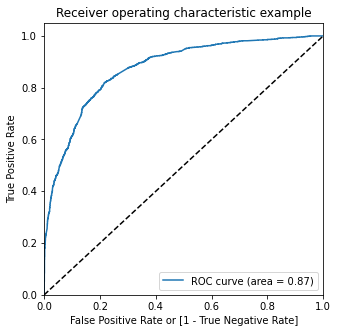

In [81]:
# ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC's 0.86 area under the curve is a very respectable value. So it appears that we have a sound model. To determine the best cutoff point, let's additionally examine the tradeoff between sensitivity and specificity.

In [82]:
# Let's make columns with various cutoffs for likelihood.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1


In [83]:
# Let's make a dataframe to display the accuracy, sensitivity, and specificity values at various probabilities.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.576777  0.986505  0.195934
0.2   0.2  0.713517  0.951140  0.492647
0.3   0.3  0.771128  0.896696  0.654412
0.4   0.4  0.800045  0.821312  0.780277
0.5   0.5  0.795786  0.754770  0.833910
0.6   0.6  0.774938  0.657515  0.884083
0.7   0.7  0.747366  0.567241  0.914792
0.8   0.8  0.719121  0.468590  0.951990
0.9   0.9  0.662183  0.317822  0.982266


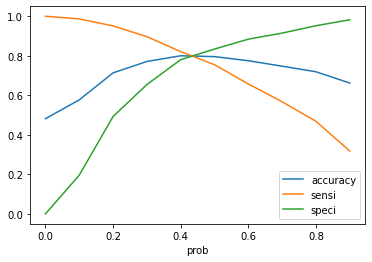

In [85]:
# Let's also plot it.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, the three measures are at their best around a value of 0.42. Now let's decide on 0.42 as our threshold.

In [86]:
# Adding 'final_predicted' column in Dataframe with 0.42 cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7989240080699395

In [88]:
# Let's re-build the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1833,  479],
       [ 418, 1731]], dtype=int64)

In [89]:
# Let's assess the additional metrics.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Sensitivity
TP/float(TP+FN)

0.8054909260120986

In [91]:
# Specificity
TN/float(TN+FP)

0.7928200692041523

This threshold seems to be valid!

## Precision-Recall View
---

Additionally, let's construct the training model utilising the precision-recall view.

In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1928,  384],
       [ 527, 1622]], dtype=int64)

### **Precision** <br>

TP/TP+FP

In [93]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8085742771684945

**Recall**

TP/(TP+FN)

In [94]:
confusion[1,1]/(confusion[1,1]+ confusion[1,0])

0.7547696603071196

### Precision and recall tradeoff

In [95]:
from sklearn.metrics import precision_recall_curve

In [96]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

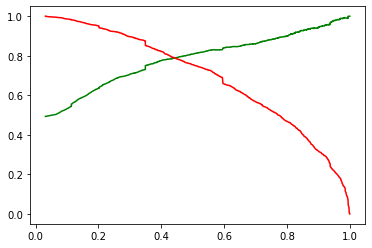

In [99]:
# plotting graph for precsion and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [100]:
# Adding 'final_predicted' column in df with 0.44 cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1,1


#### Checking All Metrics

In [101]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7966823582156467

In [102]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1855,  457],
       [ 450, 1699]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Precision
TP/float(TP+FP)

0.7880333951762524

In [105]:
# Recall
TP/float(TP+FN)

0.7906002791996277

This cutoff seems to be appropriate.

## Predicting Results from the Test Set
---

In [106]:
#Scale the test set using only "transform" 
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit',
                                                                                                          'Total Time Spent on Website']])

In [107]:
# Also choose the columns from X train for X test.
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
# Updating X test with a constant.
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1.0,0.000000,0.000000,0.0000,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0.4375,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9202,1.0,0.015936,0.416813,0.2500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6570,1.0,0.011952,0.378961,0.1875,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2668,1.0,0.031873,0.395246,0.2500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
# Also remove the unnecessary columns from X test.
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [110]:
# Predict the test set and save the results in the variable "y_test_pred
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.997444
6122    0.121690
9202    0.706824
6570    0.321260
2668    0.545197
4233    0.912541
3368    0.771433
9091    0.509851
5972    0.188594
3631    0.770770
dtype: float64

In [111]:
# Creating a dataframe from y pred
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
4771,0.997444
6122,0.121690
9202,0.706824
6570,0.321260
2668,0.545197


In [112]:
# Making y test into a dataframe.
y_test_Df = pd.DataFrame(y_test)
y_test_Df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [113]:
# Remove the index from each dataframes and append them together.
y_pred1.reset_index(drop=True, inplace=True)
y_test_Df.reset_index(drop=True, inplace=True)
# appending these 2 Dataframe
y_pred_final = pd.concat([y_test_Df, y_pred1],axis=1)
# final dataframes head
y_pred_final.head()

,Converted,0
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [114]:
# Change the column's name.
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [115]:
# Use 0.44 as the cutoff for making predictions for the test set.
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997444,1
1,0,0.121690,0
2,0,0.706824,1
3,1,0.321260,0
4,1,0.545197,1


In [116]:
# Lets check Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7850418410041841

In [117]:
# confusion Matrix
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[789, 207],
       [204, 712]], dtype=int64)

In [118]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [119]:
# Precision
TP/(TP+FP)

0.7747551686615887

In [120]:
# Recall
TP/(TP+FN)

0.777292576419214

## <font color = green> Summary
 


Many leads are generated in the first stage (above), but only a few become paying customers in the second stage. To increase prospect conversion, you need to properly nurture your potential prospects in the intermediate stages (for example, by educating them about your product and maintaining ongoing communication).


First, we need to exclude the best leads from the generated leads. 'Total Visits', 'Total Time Spent on Website', and 'Page Views Per Visit' contribute the most to a prospect's conversion potential.

Next, you should have a list of prospects on hand to inform them about new courses, services, job openings, and future higher education. Each lead should be closely monitored so that you can customize the information you send to them.

Carefully source job opportunities, information or courses that best match the interests of prospective clients. A good plan that meticulously maps out the needs of each lead goes a long way in converting them into potential customers.


You should focus on leads that convert. Conduct Q&A sessions with your leads to extract the correct information you need about them. Make further inquiries and bookings with prospects to determine their intentions and attitudes towards taking online courses.


Need to be careful with converted leads. Engage prospects in question-and-answer sessions to gather the relevant data you need about them